<a href="https://colab.research.google.com/github/MSDSF21M505/Digital-Image-Processing/blob/master/removetext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

<h1 align="center">Digital Image Processing</h1>
<h1 align="center">Project</h1>
<h1 align="center">Text Removal On Medical Images</h1>
<h1 align="center">MSDSF21M505 Muhammad Tahir</h1>
<h1 align="center">MSDSF21M530 Attique Rehman Amir</h1>


---



In [44]:
!pip install keras-ocr

In [45]:
!pip install matplotlib==3.3.0

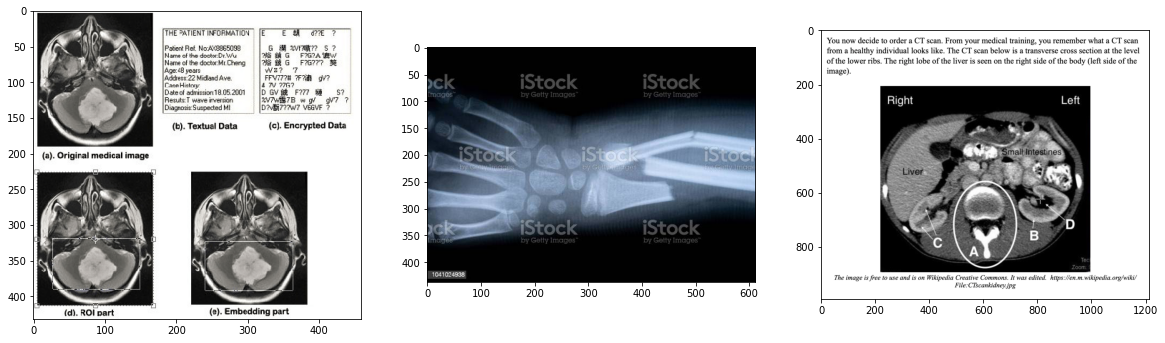

In [32]:
import matplotlib.pyplot as plt
import imageio as io
img=io.imread("./xray.png")
img2=io.imread("./Hand.jpg")
img3=io.imread("./Xray2.png")
fig, axs = plt.subplots(figsize=(20, 20))
plt.subplot(2,3,1),plt.imshow(img)
plt.subplot(2,3,2),plt.imshow(img2)
plt.subplot(2,3,3),plt.imshow(img3)
plt.show()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


<AxesSubplot:>

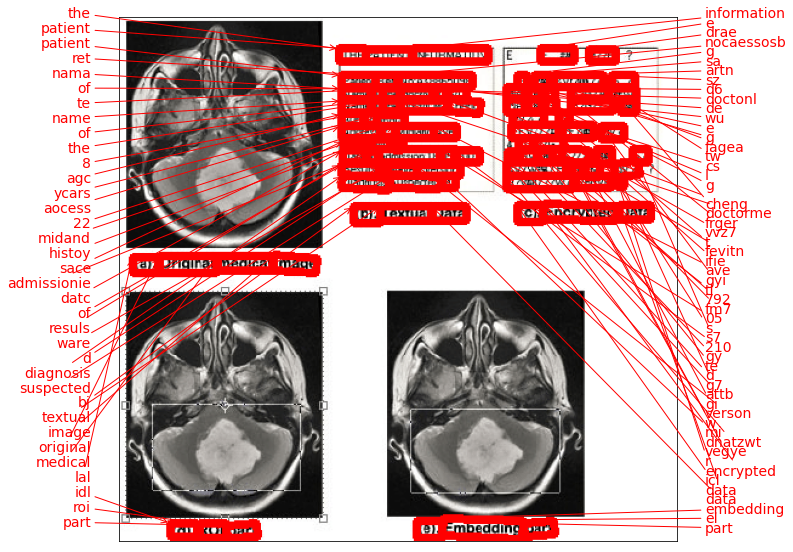

In [31]:
import keras_ocr
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(10, 10))
pipeline = keras_ocr.pipeline.Pipeline()
img = keras_ocr.tools.read('./xray.png')
img1= keras_ocr.tools.read('./Xray2.png')
img2= keras_ocr.tools.read('./Hand.jpg')
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
prediction_groups1 = pipeline.recognize([img1])
prediction_groups2 = pipeline.recognize([img2])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0] , ax=axs)  


<AxesSubplot:>

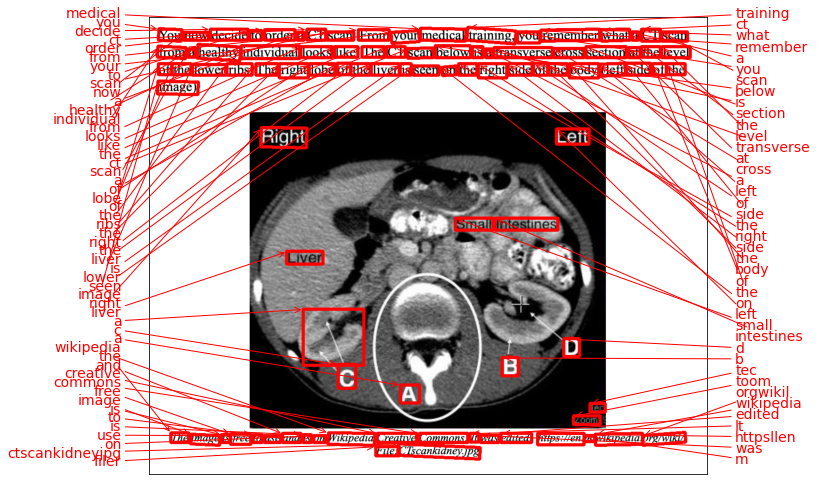

In [37]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=img1, predictions=prediction_groups1[0] , ax=axs)  

 

<AxesSubplot:>

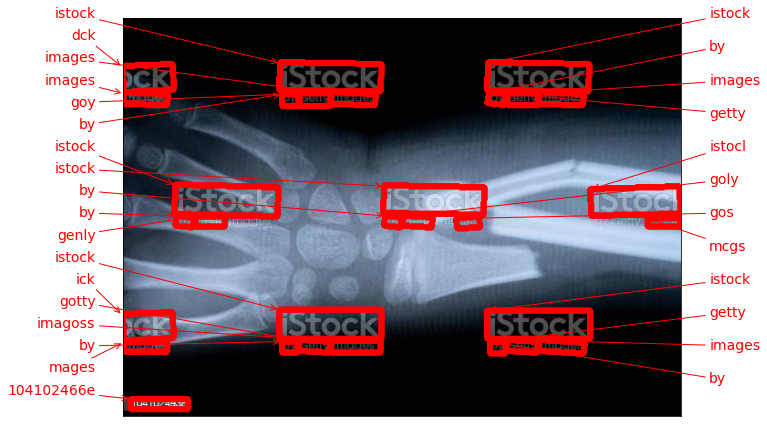

In [39]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=img2, predictions=prediction_groups2[0] , ax=axs)  

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


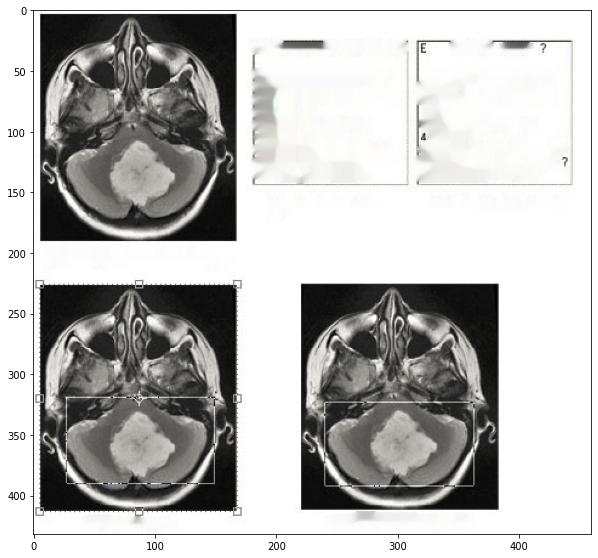

In [43]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np
fig, axs = plt.subplots(figsize=(10, 10))
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
pipeline = keras_ocr.pipeline.Pipeline()
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)
a=inpaint_text("./xray.png",pipeline)
plt.imshow(a)


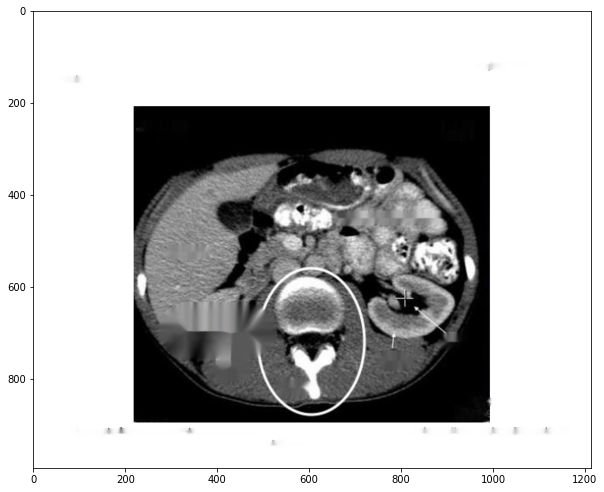

In [42]:
fig, axs = plt.subplots(figsize=(10, 10))
b=inpaint_text("./Xray2.png",pipeline)
plt.imshow(b)

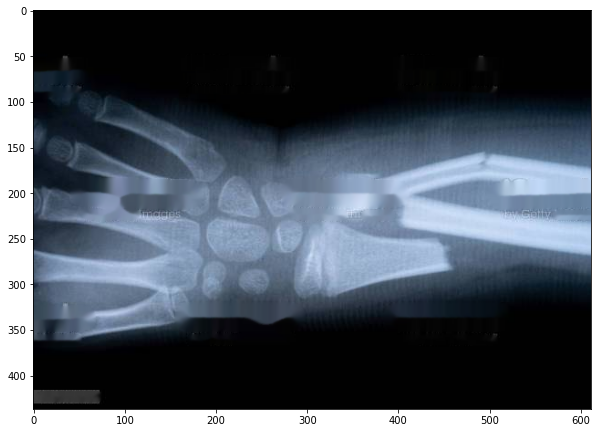

In [41]:
fig, axs = plt.subplots(figsize=(10, 10))
c=inpaint_text("Hand.jpg",pipeline)
plt.imshow(c)